In [63]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,4

from collections import defaultdict
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist

Populating the interactive namespace from numpy and matplotlib


# Data preparation

In [2]:
df = pd.read_csv("datatraining.txt")

In [3]:
df['date']= pd.to_datetime(df['date']) 
df.set_index('date')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.180000,27.272000,426.0,721.250000,0.004793,1
2015-02-04 17:51:59,23.150000,27.267500,429.5,714.000000,0.004783,1
2015-02-04 17:53:00,23.150000,27.245000,426.0,713.500000,0.004779,1
2015-02-04 17:54:00,23.150000,27.200000,426.0,708.250000,0.004772,1
2015-02-04 17:55:00,23.100000,27.200000,426.0,704.500000,0.004757,1
2015-02-04 17:55:59,23.100000,27.200000,419.0,701.000000,0.004757,1
2015-02-04 17:57:00,23.100000,27.200000,419.0,701.666667,0.004757,1
2015-02-04 17:57:59,23.100000,27.200000,419.0,699.000000,0.004757,1
2015-02-04 17:58:59,23.100000,27.200000,419.0,689.333333,0.004757,1


In [4]:
from datetime import datetime

dates = pd.to_datetime(df['date'], infer_datetime_format=True)
df['day'] = dates.dt.day

In [5]:
df.sort_values(by="date",inplace=True)

In [6]:
df.day.value_counts()

7     1440
6     1440
9     1440
5     1440
8     1440
10     574
4      369
Name: day, dtype: int64

In [14]:
day2 = df[df.day==5]
day3 = df[df.day==6]

In [15]:
day2.index

Int64Index([ 370,  371,  372,  373,  374,  375,  376,  377,  378,  379,
            ...
            1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809],
           dtype='int64', length=1440)

In [16]:
day2.set_index(day3.index, inplace = True)

In [17]:
day2.index

Int64Index([1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819,
            ...
            3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249],
           dtype='int64', length=1440)

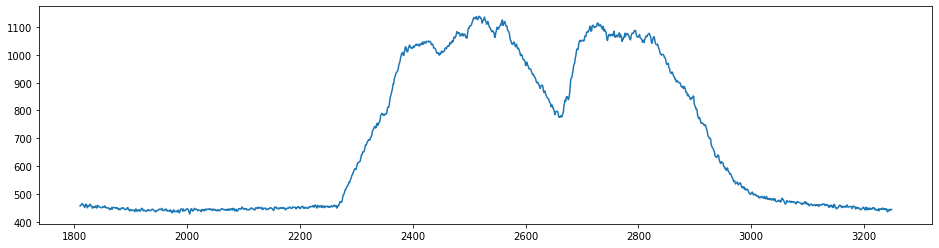

In [18]:
day2 = pd.Series(day2["CO2"])
plt.plot(day2)
plt.show()

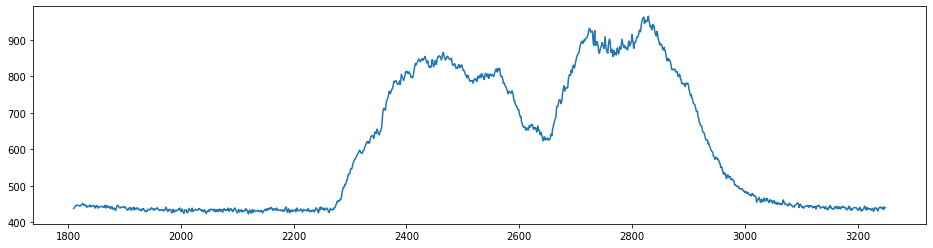

In [19]:
day3 = df[df.day==6]
day3 = pd.Series(day3["CO2"])
plt.plot(day3)
plt.show()

# DTW

## sullo stesso attributo in due giorni diversi

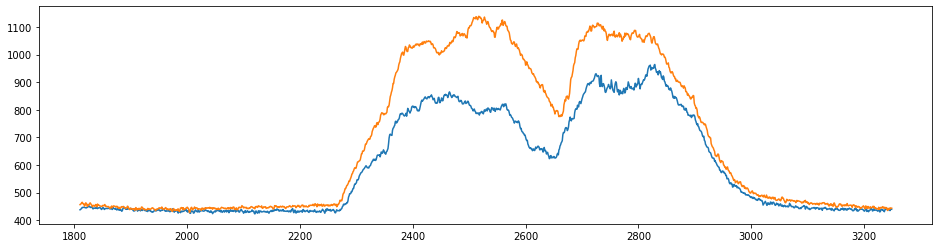

In [100]:
#mi sembra interessante operare il dtw su questi due segmenti di C02, sono simili ma si muovono a velocità differenti
#devo riuscire a overlappare il grafico

plt.plot(day3)
plt.plot(day2)
plt.show()

In [101]:
dist = dtw(day2, day3)
dist

2551.7773976763

In [102]:
path, dist = dtw_path(day2, day3)

In [89]:
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 12),
 (8, 13),
 (8, 14),
 (8, 15),
 (9, 16),
 (10, 16),
 (11, 16),
 (12, 16),
 (13, 16),
 (14, 16),
 (15, 16),
 (16, 16),
 (17, 16),
 (18, 16),
 (19, 16),
 (20, 16),
 (21, 16),
 (22, 16),
 (23, 16),
 (24, 16),
 (25, 16),
 (26, 16),
 (27, 16),
 (28, 16),
 (29, 16),
 (30, 16),
 (31, 16),
 (32, 16),
 (33, 16),
 (34, 16),
 (35, 16),
 (36, 16),
 (37, 16),
 (38, 16),
 (39, 16),
 (40, 16),
 (41, 16),
 (42, 16),
 (43, 16),
 (44, 16),
 (45, 16),
 (46, 16),
 (47, 16),
 (48, 17),
 (49, 17),
 (50, 17),
 (51, 17),
 (52, 18),
 (53, 18),
 (54, 18),
 (55, 19),
 (56, 20),
 (57, 20),
 (58, 20),
 (59, 20),
 (60, 20),
 (61, 20),
 (62, 20),
 (63, 20),
 (64, 20),
 (65, 20),
 (66, 20),
 (67, 21),
 (68, 21),
 (69, 22),
 (70, 23),
 (70, 24),
 (71, 25),
 (71, 26),
 (71, 27),
 (72, 28),
 (73, 29),
 (74, 29),
 (75, 29),
 (76, 29),
 (77, 29),
 (78, 29),
 (79, 29),
 (80, 30),
 (80, 31),
 (81, 32),
 (82

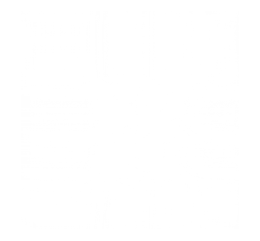

In [91]:
mat = cdist(day2.values.reshape(-1,1), day3.values.reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

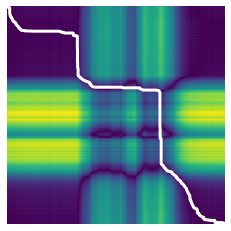

In [92]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [11]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,4

Populating the interactive namespace from numpy and matplotlib


685.9395081018519 597.6440509259255 266.42756654360215 181.15207345113586


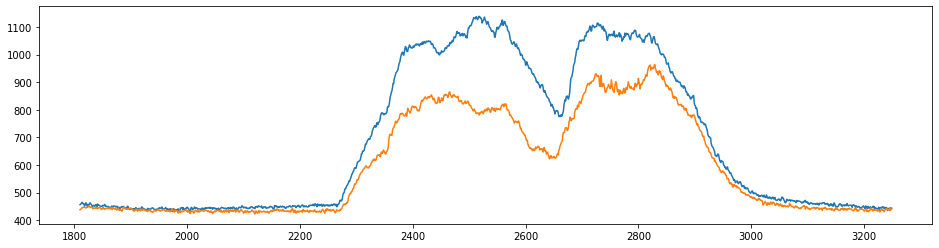

In [20]:
rcParams['figure.figsize'] = 16,4
offset = 5200
win = 100
ys = day2[offset:(offset+win)]
ys2 = day3[offset:(offset+win)]
# Normalize
#ys = (ys - ys.mean()) / ys.std()
#ys2 = (ys2 - ys2.mean()) / ys2.std()
plot(day2)
plot(day3)
print(day2.mean(), day3.mean(), day2.std(), day3.std())

In [106]:
#ho provato a fare un altro grafico ma mi da errore
#vedere notebook 8_ts_dtw.ipynb

yshift = 10  # shifts y a bit to make the plot more readable
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plot([ i, j ] , [ day3[i], day2[j]+yshift ], col)
xlim(-0.5,max(len(day3),len(day2))+0.5)
plot(day2+yshift)
plot(day3)
show()

KeyError: 0

## Su due attributi differenti

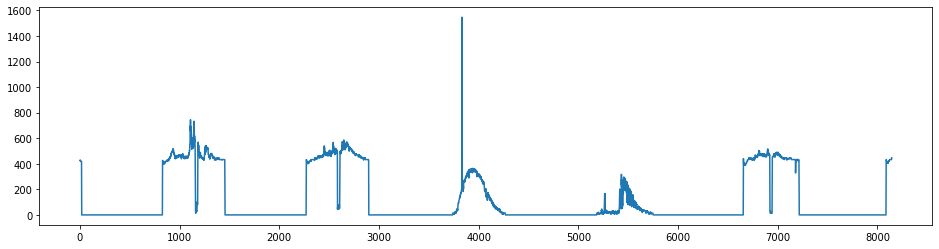

In [21]:
#faccio il dtw stavolta su due segmenti di ts con due attributi diversi, light e temperature

ts1= df['Light']
plt.plot(ts1)
plt.show()

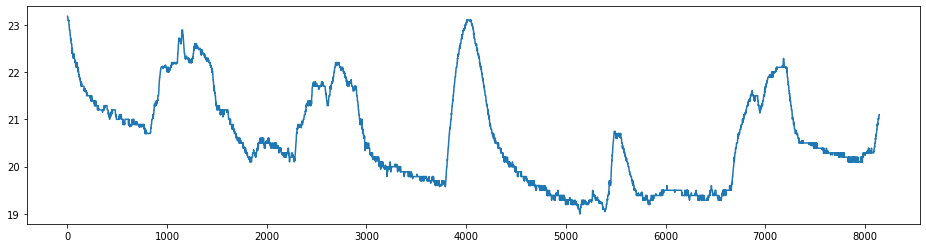

In [22]:
ts2= df['Temperature']
plt.plot(ts2)
plt.show()

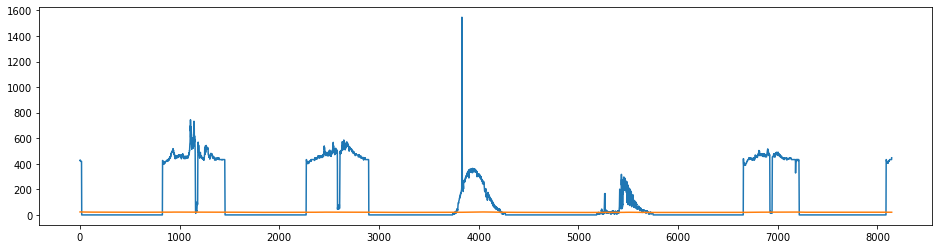

In [23]:
plt.plot(ts1)
plt.plot(ts2)
plt.show()

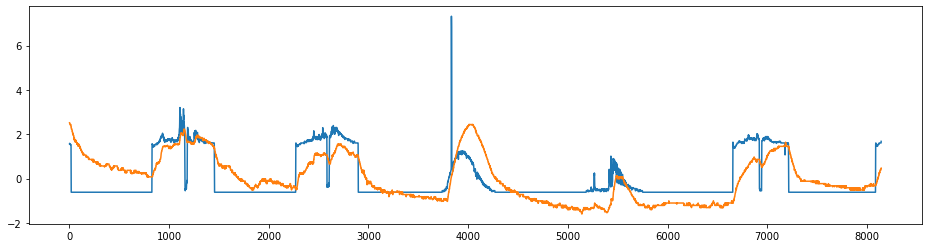

In [114]:
#le trasformo per renderle comparabili

plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.show()

In [26]:
x = (ts1 - ts1.mean())/ts1.std()
y = (ts2 - ts2.mean())/ts2.std()

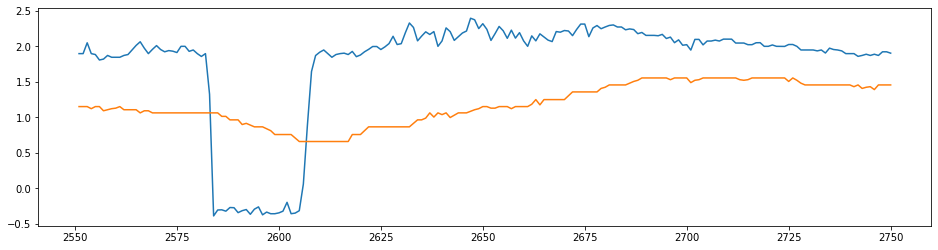

In [44]:
#questo segmento mi sembra interessante perchè la teperatura è influenzata dalla luce
#la ts temperature segue il percorso di light ma piu lentamente e con meno picchi

plt.plot(x[2550:2750])
plt.plot(y[2550:2750])

In [50]:
dist = dtw(x[2550:2750], y[2550:2750])
dist

9.627416730130191

In [60]:
path, dist = dtw_path(x[2550:2750], y[2550:2750])

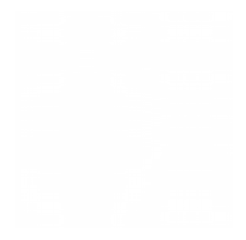

In [64]:
mat = cdist(x[2550:2750].values.reshape(-1,1), y[2550:2750].values.reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

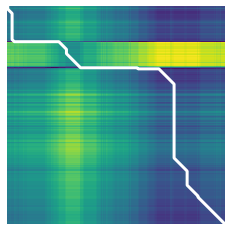

In [65]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()